In [3]:
import numpy as np
import torch
from torch.distributions import MultivariateNormal, Normal
import matplotlib.pyplot as plt

def get_contour_levels(image, quantiles):
    # get cdf of densities
    vmax = image.max()
    test_levels = np.linspace(0, vmax, 1000)
    
    # for each level calculate the fractional sum
    total = image.sum()

    sums = []
    for lvl in test_levels:
        sums += [np.where(image >= lvl, image, 0.0).sum() / total]
    sums = np.array(sums)
    
    # calculate levels
    levels = []
    for ele in quantiles[::-1]:
        diff = sums - ele
        levels += [test_levels[np.where(np.diff(np.sign(diff)))]]

    return np.array(levels).flatten()


# test image
n = 100
x = torch.linspace(-5,5,n)
xx = torch.stack(torch.meshgrid(x,x))
pts = xx.flatten(start_dim=1).T

dist = MultivariateNormal(torch.zeros(2), torch.eye(2))
p = dist.log_prob(pts).exp().reshape(n,n)


print(p.shape)
q = [0.1]
clevels = get_contour_levels(p, q)

torch.Size([100, 100])


tensor(0.1045)
tensor(0.8955)


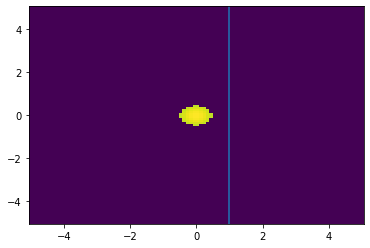

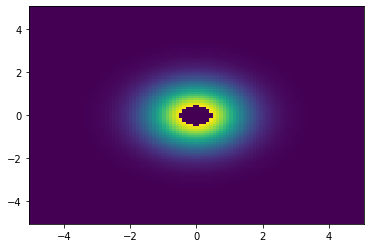

In [5]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

ph = torch.where(p >= clevels[0], p, torch.zeros(1))
pl = torch.where(p < clevels[0], p, torch.zeros(1))
ax.pcolor(*xx, ph)
ax2.pcolor(*xx, pl)
print(ph.sum() / p.sum())
print(pl.sum() / p.sum())
#ax.(*xx, p, levels=clevels)
#ax.axhline(1.0)
ax.axvline(1.0)